Ben Berger - 252255

Duco Floris Lam - s252126

# Assignment 1.1

### Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook

> What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

In random networks, all nodes have roughly the same degree, whereas real networks contain outliers. Therefore, random networks provide a poor model for real-world networks.

> List the four regimes that characterize random networks as a function of $\langle k \rangle$.

k < 1 -> Subcritical

k = 1 -> Critical Point

1 < k < ln N -> Supercritical Regime

k > ln N -> Connected Regime

> According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

In real networks, the clustering coefficient remains relatively constant. Therefore, random networks fail to provide an accurate model of real-world networks, where shortest paths are dominated by large hubs with many connections. Since the clustering coefficient is stable in real networks, hubs are more common compared to random networks, where large hubs are rare.

### WS edition

> First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 

In [30]:
# Imports
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [31]:
G_ws_01 = nx.watts_strogatz_graph(500, 4, 0.0)
G_ws_02 = nx.watts_strogatz_graph(500, 4, 0.1)
G_ws_03 = nx.watts_strogatz_graph(500, 4, 1.0)

print(f"Average shortest path length for p = 0.0: {nx.average_shortest_path_length(G_ws_01)}")
print(f"Average shortest path length for p = 0.1: {nx.average_shortest_path_length(G_ws_02)}")
print(f"Average shortest path length for p = 1.0: {nx.average_shortest_path_length(G_ws_03)}")

Average shortest path length for p = 0.0: 62.875751503006015
Average shortest path length for p = 0.1: 7.352288577154309
Average shortest path length for p = 1.0: 4.728472945891784


> Describe what happens to the network when $p = 1$.

As $p$ approaches 1, the network begins to resemble a fully randomized network, since every single link is randomly connected.

> Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.

In [32]:
# Generate random network with the Barabasi-Albert model from Week 3
bG = nx.Graph()

bG.add_edge(1,2)

for _ in range(500):
    temp_edge_flattened = np.array(bG.edges).flatten().tolist()
    
    bG.add_edge(rd.choice(temp_edge_flattened), max(temp_edge_flattened) + 1)

average_path_length_rd = nx.average_shortest_path_length(bG)

average_path_length_ws = nx.average_shortest_path_length(G_ws_01)

current_p = 0.0

# Increase p until the average shortest path length is similar to the random network from the Barabasi-Albert model
while(average_path_length_rd < average_path_length_ws):
    current_p += 0.005

    temp_G = nx.watts_strogatz_graph(500, 4, current_p)

    average_path_length_ws = nx.average_shortest_path_length(temp_G)

print("For p = " + str(current_p) + " the average path length of the graph is " + str(average_path_length_ws) + " which is close to the average path length of a random graph which is " + str(average_path_length_rd))

For p = 0.1950000000000001 the average path length of the graph is 6.184801603206413 which is close to the average path length of a random graph which is 6.2497475169183545


> Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring.
> Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

In [33]:
# Calculate path lengths and standard deviation

ps = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

mean_paths = []
std_paths = []

for p in ps:
    path_lengths = []
    for _ in range(50):
        G = nx.watts_strogatz_graph(500, 4, p)
        d = nx.average_shortest_path_length(G)
        path_lengths.append(d)
    mean_paths.append(np.mean(path_lengths))
    std_paths.append(np.std(path_lengths))

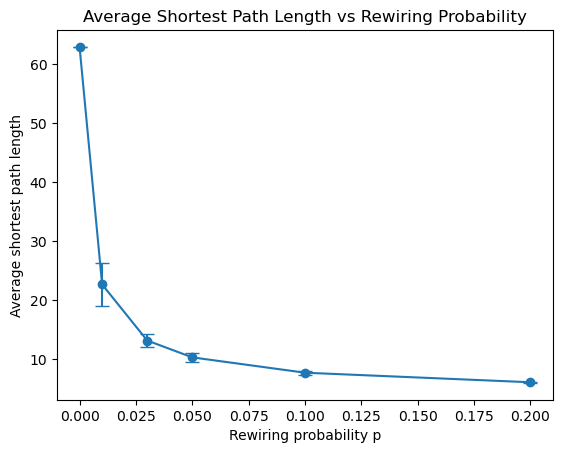

In [34]:
# Make plot
plt.errorbar(ps, mean_paths, yerr=std_paths, fmt='-o', capsize=5)
plt.xlabel('Rewiring probability p')
plt.ylabel('Average shortest path length')
plt.title('Average Shortest Path Length vs Rewiring Probability')
plt.show()

The figure above shows the small-world effect with a practical example. The x-axis shows the rewiring probability for the Watts-Strogatz graph, and the y-axis shows the average path length of the resulting graph. The Watts-Strogatz graph was generated with 500 nodes and a degree of 4. The graph shows that the average path length drastically decreases even with a small rewiring probability. When the rewiring probability gets larger, the effect decreases. Also interesting is that the standard deviation is very large for rewiring probability 0.01 and decreases with larger $p$.

### BA-Edition

> What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

_Anomalous Regime_ – When $\gamma$ is lower than 2, the number of connections in the largest hub grows faster than the number of nodes in the network, thus the hub will run out of nodes to connect to. Similarly, the average degree <k> also diverges to infinity, given a sufficiently large number of nodes. Large scale-free networks in the anomalous regime, without multilinks, cannot exist.

_Scale-Free Regime_ – When 2 < $\gamma$ < 3, the number of connections in the largest hub diverges, yet the average degree <k> does not. Thus, we have a scale-free network that may contain super hubs with a very large number of connections, but also nodes with very few connections. Because of these super hubs, the networks are very small, as the shortest paths between nodes shrink enormously.

_Random Regime_ – When 3 < $\gamma$, both the average degree <k> and the variance are finite. Thus, highly connected hubs are extremely rare, and the networks start resembling a random network. 

> What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

_Sublinear_ – When 0 < $\alpha$ < 1, highly connected nodes do receive some preferential treatment, but not enough to allow for highly connected large hubs to exist. Only modest, smaller, but still connected hubs may exist.

_Linear_ – When $\alpha$ = 1, we reach the classic BA model: the degree distribution follows a power law, and we see a scale-free network. The few connected hubs that exist dominate over loosely connected nodes when it comes to finding the shortest paths.

_Superlinear_ – When 1 < $\alpha$, highly connected nodes are disproportionately attractive, meaning that they will dominate when it comes to receiving new links. This gives a _winner-takes-all_ effect, where a few giant super hubs dominate the entire network.

> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`.

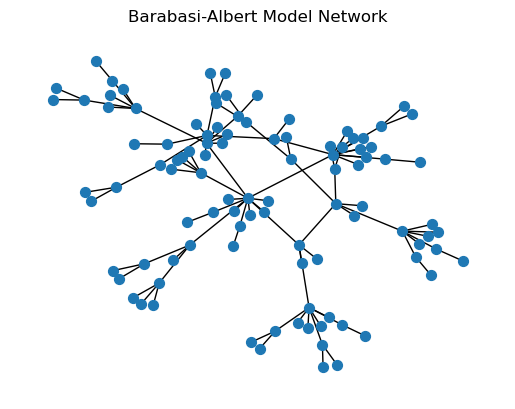

Visualization of the Barabasi-Albert model network with 102 initial nodes


In [39]:
bG = nx.Graph()

# First create a graph consisting of a single link
bG.add_edge(1,2)

# Then add others nodes, connecting one of the existing nodes in proportion to their degree
for _ in range(100):
    temp_edge_flattened = np.array(bG.edges).flatten().tolist()
    
    bG.add_edge(rd.choice(temp_edge_flattened), max(temp_edge_flattened) + 1)

# Make plot
plt.title('Barabasi-Albert Model Network')
nx.draw(bG, node_size=50)
plt.show()
print("Visualization of the Barabasi-Albert model network with 102 initial nodes")

In [40]:
# Add more nodes until you have a 5000 node network
for _ in range(5000 - 102):
    temp_edge_flattened = np.array(bG.edges).flatten().tolist()    
    bG.add_edge(rd.choice(temp_edge_flattened), max(temp_edge_flattened) + 1)

In [41]:
# What's the maximum and minimum degree?
degree_sequence = [d for (_, d) in bG.degree()]

min_degree = min(degree_sequence)
max_degree = max(degree_sequence)

print(f"The min degree of a single node in our graph is {min_degree}, and " +
        f"the max degree of a single node in our graph is {max_degree}.")

The min degree of a single node in our graph is 1, and the max degree of a single node in our graph is 92.


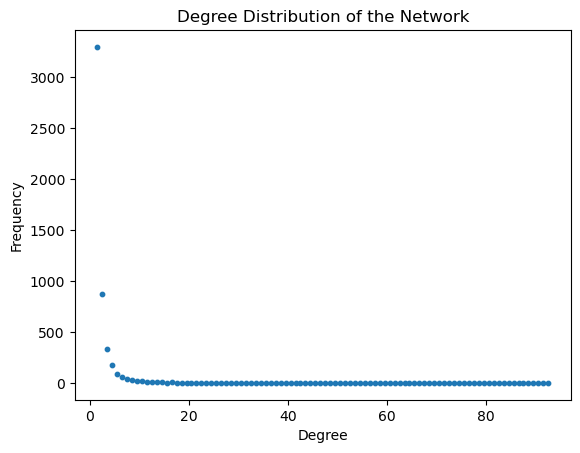

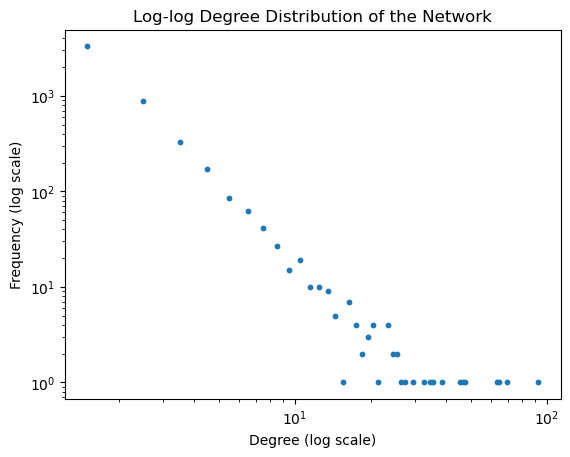

In [42]:
# Now, bin the degree distribution using `numpy.histogram`.

counts, bins = np.histogram(degree_sequence, bins = (range(min_degree, max_degree+2)))

# Take the average between two consecutive datapoints
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Plot the distribution. Plot it with both linear and log-log axes.
plt.scatter(x = bin_centers, y = counts, s = 10)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Network')
plt.show()

plt.scatter(x = bin_centers, y = counts, s = 10)
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Log-log Degree Distribution of the Network')
plt.xscale("log")
plt.yscale("log")
plt.show()

When we create a large BA graph, we see that our degree distribution adheres to a power law. Thus, when we switch the axes to represent a log-log graph, we observe a linear correlation between the degrees of our nodes and the frequency with which they are observed. This aligns with the theory explained in Section 5 of the book.

For more information, refer to [the book](http://networksciencebook.com/chapter/5#non-linear)

# Assignment 1.2: Stats and visualization of the Rock Music Network

> * Document how you crawled the network.
>    * First, simply describe the steps of the process (what you did, step by step)

All the files required we used to build the network can also be downloaded from GitHub https://github.com/badumts78/Social-Graphs/tree/main/Assignment1

In [3]:
# Imports 

import networkx as nx
import matplotlib.pyplot as plt
import urllib.request as request, json
import urllib.parse
import os
import re

First, we opened the file where we saved the Wikipedia page with all musicians, which we manually modified so that it only contains musicians as links. Then we extracted all the links from the file using regex. The regular expression we used is from https://regex101.com/r/5R0WQ1/1

In [4]:
f = open('all-musicians.txt', 'r')
allMusiciansText = f.read()
f.close()

allMusiciansList = re.findall(r'\[\[([^|\]#]+)(?:#[^\]]*)?(?:\|([^\]]+))?\]\]', allMusiciansText)

Next, we requested every link that we found above and saved it to a .txt file, where the name of the file is the name of the musician, just without any /, since that symbol is not allowed in file names.

In [ ]:
# Asked ChatGPT how to add headers to not get HTTP error 403
opener = request.build_opener()
opener.addheaders = [('User-Agent', 'MyApp/1.0')]
request.install_opener(opener)

baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

for musician in allMusiciansList:
    params = {
        "action": "query",
        "prop": "revisions",
        "rvprop": "content",
        "titles": musician[0].strip(),
        "format": "json"
    }
    query = baseurl + urllib.parse.urlencode(params)

    with request.urlopen(query) as response:
        source = response.read()
        data = json.loads(source)

        with open("Musicians/" + musician[0].replace('/', ' ') + ".txt", "w", encoding="utf-8") as f:
            f.write(str(data['query']['pages']))

Then, we read all the downloaded files and added them as nodes, where the name of the node is the name of the file (without the .txt), and the length of content is the number of words in the file, separated by whitespaces.

In [5]:
G = nx.DiGraph()

files = os.listdir("Musicians")

for file in files:
    filepath = "Musicians/" + file
    with open(filepath, "r") as f:
        G.add_node(file.replace(".txt", ''), length_of_content = len(f.read().split()))

After that, we read all the files again, extracted the links, and if the link exists in the nodes (name without /, because that didn’t work with naming the files), we add an edge.

In [6]:
for file in files:
    filepath = "Musicians/" + file
    with open(filepath, "r") as f:
        filecontent = f.read()

        # Using the same regex as above
        links = re.findall(r'\[\[([^|\]#]+)(?:#[^\]]*)?(?:\|([^\]]+))?\]\]', filecontent)

        for link, _ in links:
            if link.replace('/', ' ') in list(G.nodes):
                G.add_edge(file.replace(".txt", ''), link.replace('/', ' '))

Remove all nodes without any connection

In [7]:
no_connections = [node for node in G.nodes if (G.out_degree(node) == 0 and G.in_degree(node) == 0)]

G.remove_nodes_from(no_connections)

Finally, we get the largest weakly connected component (for our data, GL = G).

In [8]:
largest = max(nx.weakly_connected_components(G), key=len)

GL = G.subgraph(largest)

print("G is a " + str(G))
print("And GL is also a " + str(GL))

G is a DiGraph with 483 nodes and 7219 edges
And GL is also a DiGraph with 483 nodes and 7219 edges


>    * Then, write a short section about which part of the process that was most difficult

After doing the statistics on the network, we found that we had an outlier with AllMusic, and after a short research we discovered that AllMusic is not a musician but a music database. So we needed to manually remove it and run everything again.

>    * Next write a short section about how you used LLMs to help you

In exercise 1, we got an HTTP 403 response when we made an API call to Wikipedia. To resolve this issue, we asked ChatGPT for a solution, which gave us the HTTP headers. We also encountered some errors with an undefined character in the requests to Wikipedia, so we used an LLM to check what that error actually was, and it suggested using urllib.parse. Otherwise, we didn’t really use LLMs, but as explained above, the regular expression for the Wikipedia links is from https://regex101.com/r/5R0WQ1/1

>    * Finally, compose a short section about what you would do differently if you had to do it again

The requesting of Wikipedia pages took a long time, and after a short research we found out that we could have also requested up to 50 pages at once. So if we were to do it again, we would first read the documentation more thoroughly to speed up the process afterwards, maybe even doing some node caching when creating the graph.

## Simple network statistics and analysis

> What is the number of nodes in the network? 

In [21]:
n_nodes = len(list(GL.nodes))

print("The number of nodes is " + str(n_nodes))

The number of nodes is 483


> What is the number of edges in the network? 

In [22]:
n_edges = len(list(GL.edges))

print("The number of edges is " + str(n_edges))

The number of edges is 7219


> Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?

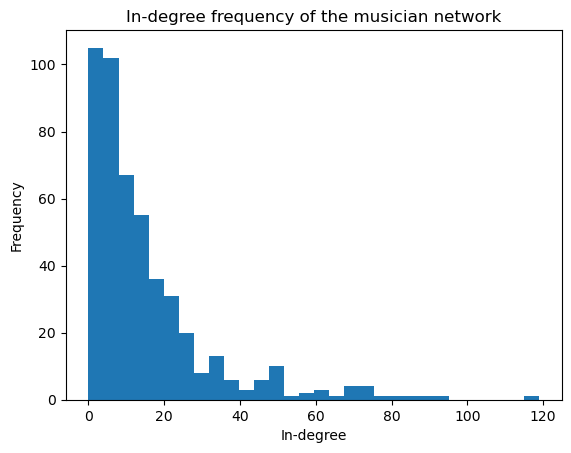

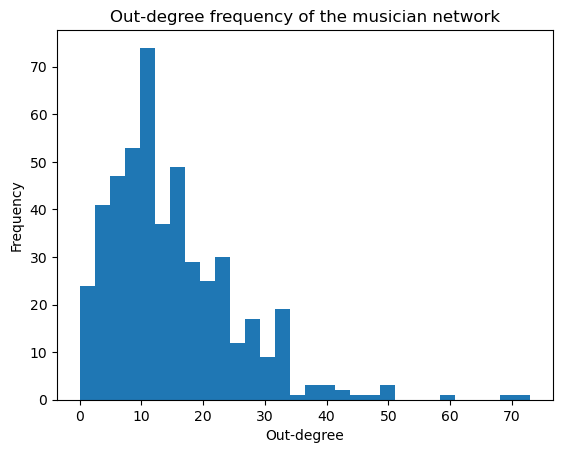

In [23]:
in_degree_sequence = sorted([d for d in GL.in_degree()], key = (lambda x: x[1]))
out_degree_sequence = sorted([d for d in GL.out_degree()], key = (lambda x: x[1]))

number_bins = 30

plt.hist([x[1] for x in in_degree_sequence], bins=number_bins)
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.title("In-degree frequency of the musician network")
plt.show()

plt.hist([x[1] for x in out_degree_sequence], bins=number_bins)
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.title("Out-degree frequency of the musician network")
plt.show()

Most musicians have an in-degree of 0 or a very small one, and a few musicians have a very high in-degree. The out-degree follows more of a normal distribution with a mean around 12. Our theory for why this is the case is that many musicians draw inspiration from a very small group of highly influential musicians. If a Wikipedia page were to include a very large number of outgoing links, the page would be dominated by links rather than substantive content. In practice, this keeps the out-degree limited and produces the more balanced distribution we see.

> Compare the out-degree distribution to a *random network* with the same number of nodes and links.

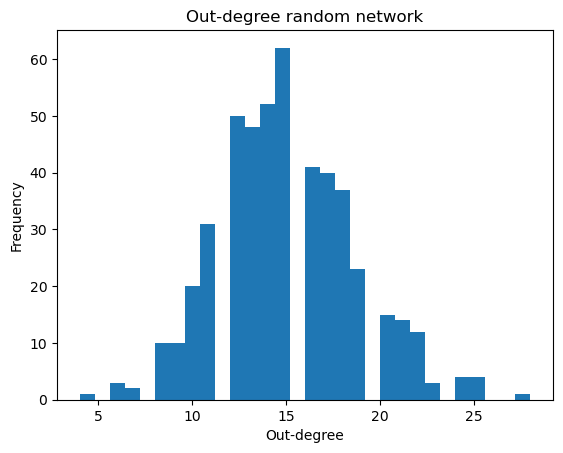

In [ ]:
# We used the build in random graph function to generate a directed random graph
rG = nx.gnm_random_graph(n_nodes, n_edges, directed=True)

out_degree_sequence_rG = sorted([d for d in rG.out_degree()], key = (lambda x: x[1]), reverse=True)

plt.hist([x[1] for x in out_degree_sequence_rG], bins=number_bins)
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.title("Out-degree random network")
plt.show()

We chose the built-in gdm_random_graph function of NetworkX to generate the random graph. We can see that it is a clear normal distribution around 15.

>     * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.


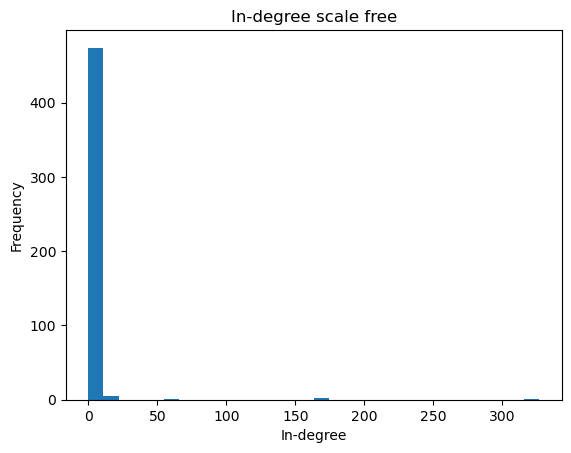

In [25]:
G_sf = nx.scale_free_graph(n_nodes)

in_degree_sequence_sf = sorted([d for d in G_sf.in_degree()], key = (lambda x: x[1]), reverse=True)

plt.hist([x[1] for x in in_degree_sequence_sf], bins=number_bins)
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.title("In-degree scale free")
plt.show()

A scale-free network with the same number of nodes has an even higher spike for a small number of in-degree nodes and very few nodes with a high in-degree. However, both distributions are clearly heavy-tailed, thus they assume the same type of heavy-tail distribution.

> Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?

In [ ]:
# Since the array is ordered by the size we can just take the last 5
print("The musicians with the hightest in-degree are:")
print(in_degree_sequence[-5:])

The musicians with the hightest in-degree are:
[('David Bowie', 83), ('Metallica', 85), ('Queen (band)', 88), ('Bob Dylan', 95), ('Led Zeppelin', 119)]


As expected, the most famous musicians have the highest in-degree; as they exert the most influence, they are referenced the most.

In [ ]:
# Since the array is ordered by the size we can just take the last 5
print("The musicians with the hightest out-degree are:")
print(out_degree_sequence[-5:])

The musicians with the hightest out-degree are:
[('Bryan Adams', 51), ('Def Leppard', 51), ('Black Sabbath', 59), ('Deep Purple', 70), ('Alice in Chains', 73)]


Given the fast decay of the frequencies, our theory of the out-degree following a normal distribution is supported.

> What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

In [ ]:
# Sort the array based on length attribute and print out last 10
sorted_length = sorted(list(GL.nodes(data=True)), key= lambda x: x[1]['length_of_content'])

print(sorted_length[-10:])

[('Marilyn Manson (band)', {'length_of_content': 24155}), ('The Beach Boys', {'length_of_content': 24280}), ('David Bowie', {'length_of_content': 24400}), ('Elton John', {'length_of_content': 24413}), ('U2', {'length_of_content': 24516}), ('The Rolling Stones', {'length_of_content': 25717}), ('Paul McCartney', {'length_of_content': 26365}), ('Queen (band)', {'length_of_content': 26776}), ("Guns N' Roses", {'length_of_content': 29303}), ('Bob Dylan', {'length_of_content': 30154})]


### Visualizing the networks

> Let's build a simple visualization of the network

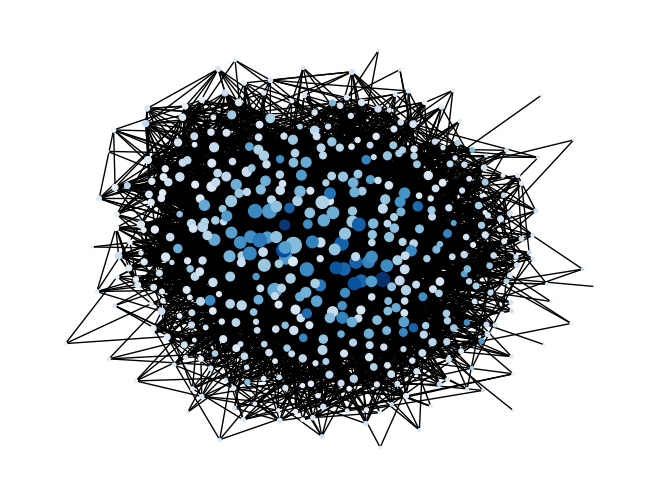

In [20]:
G_und = GL.to_undirected() 

node_sizes = [dict(G_und.degree())[n] for n in G_und.nodes()]

node_colors = [G_und.nodes[n]['length_of_content'] for n in G_und.nodes()]

nx.draw_kamada_kawai(G_und, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues)

Here we visualized the connections of the rock musicians as an undirected graph. The node size corresponds to the degree of the node, the larger the degree, the larger the node. The color corresponds to the length of the page. Nodes that are more blue have more content on the page.

### Distribution of Work

As the whole assignment consisted of previous exercises, which we had both completed, the work could be split up between us arbitrarily. For part 1.1, Ben refined the coding exercises while Duco refined the theory and the explanations behind it. For part 1.2, a similar division was done. Finally, we both sat down together and worked through the entire assignment, refining each other’s answers and clarifying explanations, comments, and code. Overall, the division of labour was not exactly 50/50; however, we did strive to reach that balance. We ended up dividing the work about 60/40, with 60% being Ben's contribution and 40% being Duco's contribution.